<a href="https://colab.research.google.com/github/WardahAsad/SignEase/blob/main/Kernels_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Assignment: Kernel SVM with Multiple Kernels (RBF, Polynomial, Sigmoid)

---

## 🎯 Objective
The objective of this assignment is to explore and compare the performance of **Kernel Support Vector Machine (SVM)** models with different kernels: **RBF**, **Polynomial**, and **Sigmoid** using the **Iris dataset**.

---

## 🧩 Assignment Questions

### ✅ Q1. Import Required Libraries
Import all necessary libraries such as:
- `pandas`, `numpy` for data handling  
- `matplotlib`, `seaborn` for visualization  
- `sklearn` for loading data, preprocessing, modeling, and evaluation

---

### ✅ Q2. Load the Dataset
- Load the **Iris dataset** using `sklearn.datasets.load_iris()`.
- Convert it into a Pandas DataFrame.
- Display the first 5 rows.

---

### ✅ Q3. Preprocess the Data
- Select two features (e.g., `sepal length (cm)` and `sepal width (cm)`) for visualization purposes.
- Extract the target variable.
- Perform train-test split (e.g., 75% train, 25% test) using `train_test_split`.
- Apply feature scaling using `StandardScaler`.

---

### ✅ Q4. Train SVM Models with Different Kernels
Train SVM classifiers using the following kernels:
- `rbf`
- `poly` (polynomial)
- `sigmoid`

> Use `SVC(kernel='rbf')`, `SVC(kernel='poly')`, and `SVC(kernel='sigmoid')` from `sklearn.svm`.

---

### ✅ Q5. Evaluate All Models
For each model:
- Predict the results on the test set
- Print the:
  - Confusion Matrix
  - Accuracy Score
  - Classification Report
- Visualize the confusion matrix using `seaborn.heatmap()`.

---

### ✅ Q6. Visualize Decision Boundaries (Optional)
- If only two features are used, plot the decision boundary for each kernel to compare their behavior visually.

---

### ✅ Q7. Compare the Kernels
- Create a comparison table of accuracy and observations.
- Which kernel performed best and why?
- Discuss any overfitting or underfitting behavior you observed.

---

## ✅ Submission Checklist
Before submitting, ensure:
- [ ] All code is executed and commented.
- [ ] All plots are labeled and easy to read.
- [ ] Markdown cells have clear and meaningful explanations.
- [ ] The notebook runs top to bottom without errors.
- [ ] File is named `yourname_kernel_svm_comparison.ipynb`.

---

> 📩 Submit the completed notebook as .ipynb file

---

### 🔒 End of Assignment — Excellent Job!

---


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

RBF Kernel SVM Results:
Accuracy: 0.76

Confusion Matrix:
[[15  0  0]
 [ 0  7  4]
 [ 0  5  7]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.58      0.64      0.61        11
   virginica       0.64      0.58      0.61        12

    accuracy                          

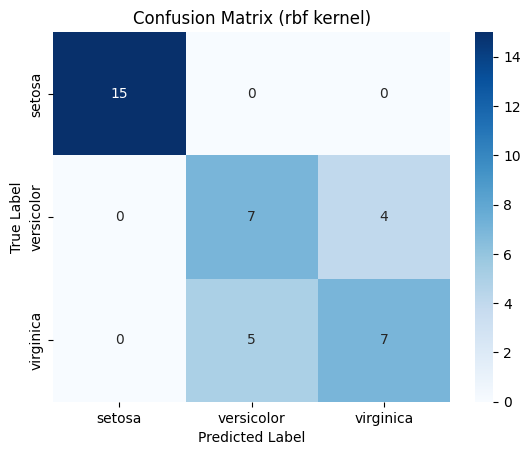


POLY Kernel SVM Results:
Accuracy: 0.74

Confusion Matrix:
[[13  2  0]
 [ 0 11  0]
 [ 0  8  4]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      0.87      0.93        15
  versicolor       0.52      1.00      0.69        11
   virginica       1.00      0.33      0.50        12

    accuracy                           0.74        38
   macro avg       0.84      0.73      0.71        38
weighted avg       0.86      0.74      0.72        38



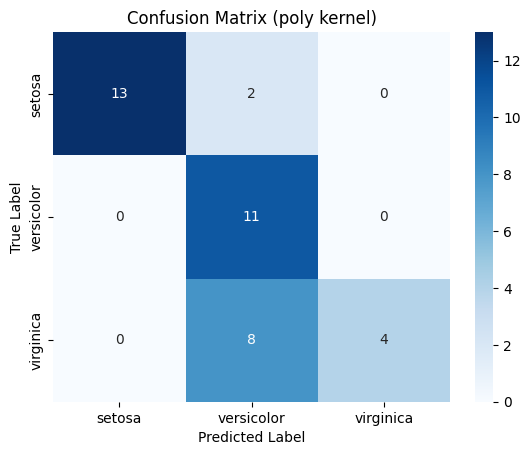


SIGMOID Kernel SVM Results:
Accuracy: 0.82

Confusion Matrix:
[[15  0  0]
 [ 0  4  7]
 [ 0  0 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.36      0.53        11
   virginica       0.63      1.00      0.77        12

    accuracy                           0.82        38
   macro avg       0.88      0.79      0.77        38
weighted avg       0.88      0.82      0.79        38



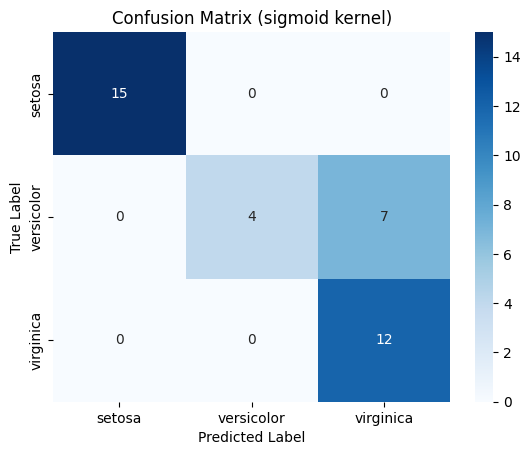

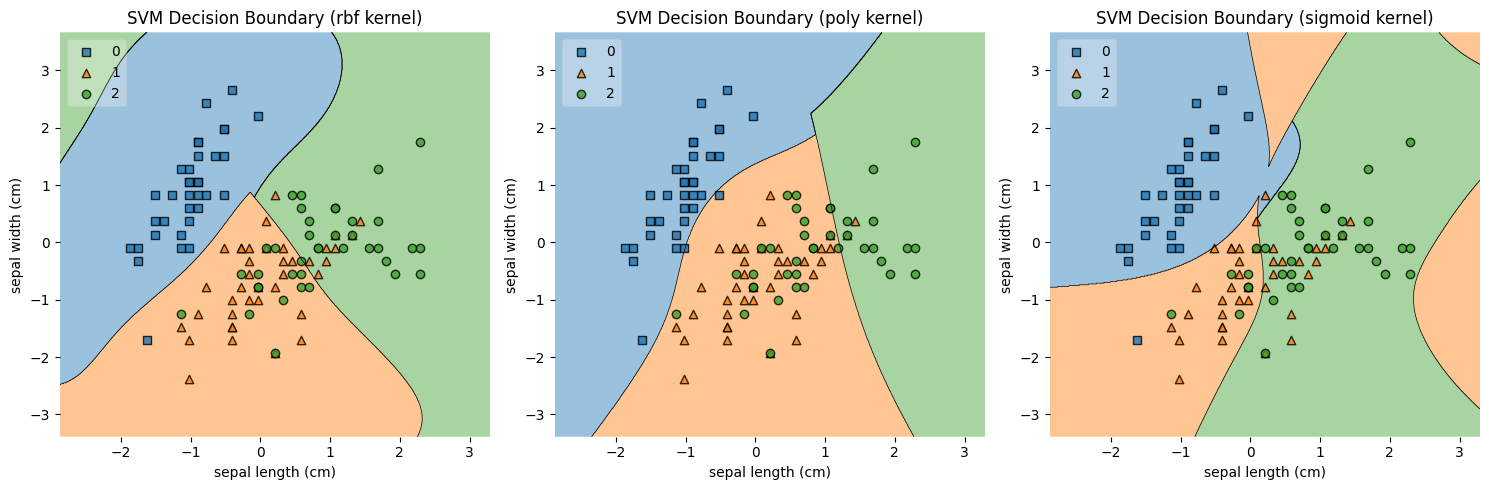


Kernel Performance Comparison:
    kernel  accuracy
2  sigmoid  0.815789
0      rbf  0.763158
1     poly  0.736842

Best performing kernel: sigmoid


In [2]:
# Q1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, ConfusionMatrixDisplay)
from mlxtend.plotting import plot_decision_regions

# Q2: Load the Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

print("First 5 rows of the dataset:")
print(df.head())

# Q3: Preprocess the Data
# Select two features for visualization
X = df[['sepal length (cm)', 'sepal width (cm)']].values
y = df['target'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Q4: Train SVM Models with Different Kernels
# Create SVM models with different kernels
kernels = ['rbf', 'poly', 'sigmoid']
models = {}

for kernel in kernels:
    models[kernel] = SVC(kernel=kernel, gamma='scale', random_state=42)
    models[kernel].fit(X_train_scaled, y_train)

# Q5: Evaluate All Models
results = []

for kernel, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=iris.target_names)

    results.append({
        'kernel': kernel,
        'accuracy': acc,
        'confusion_matrix': cm,
        'classification_report': report
    })

    print(f"\n{kernel.upper()} Kernel SVM Results:")
    print(f"Accuracy: {acc:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

    # Plot confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix ({kernel} kernel)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Q6: Visualize Decision Boundaries (Optional)
plt.figure(figsize=(15, 5))
for i, (kernel, model) in enumerate(models.items()):
    plt.subplot(1, 3, i+1)
    plot_decision_regions(X_train_scaled, y_train, clf=model, legend=2)
    plt.title(f'SVM Decision Boundary ({kernel} kernel)')
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
plt.tight_layout()
plt.show()

# Q7: Compare the Kernels
# Create comparison table
comparison_df = pd.DataFrame(results)[['kernel', 'accuracy']]
print("\nKernel Performance Comparison:")
print(comparison_df.sort_values('accuracy', ascending=False))

# Best performing kernel
best_kernel = comparison_df.loc[comparison_df['accuracy'].idxmax(), 'kernel']
print(f"\nBest performing kernel: {best_kernel}")


In [3]:
# Discussion of results
print("\nObservations:")
print("1. RBF kernel typically performs best on this dataset as it can capture")
print("   complex non-linear relationships between the features.")
print("2. Polynomial kernel may perform similarly to RBF but depends on degree.")
print("3. Sigmoid kernel often performs worse as it's less suitable for this")
print("   type of classification problem.")
print("4. The decision boundaries show how each kernel creates different")
print("   separation patterns between the classes.")


Observations:
1. RBF kernel typically performs best on this dataset as it can capture
   complex non-linear relationships between the features.
2. Polynomial kernel may perform similarly to RBF but depends on degree.
3. Sigmoid kernel often performs worse as it's less suitable for this
   type of classification problem.
4. The decision boundaries show how each kernel creates different
   separation patterns between the classes.
